# Cultural Map of the World

## 1. Introduction

The world is full of confrontations between people of different nations who think, feel, and act differently. Understanding and acknowledging these differences is the first step for bringing about worldwide solutions that will work for everyone. 

In this project, we will attempt to create a cultural map of the world based on measurable characteristics of cultures: Cultural Dimensions.

The meaning of each dimension is briefly summarized below:

1 - (PD)  Power Distance: This dimension explains the extent to which members who are less powerful in a society accept and also expect that the distribution of power takes place unequally.

2 - (IDV) Individualism vs. Collectivism: This dimension describes the preferential treatment of “in-group” members in collectivist societies vs. equal treatment for all (including strangers) in more individualistic societies.

3 - (MAS) Masculinity vs. Femininity: Masculinity implies a society’s preference for assertiveness, competition, achievement, and material rewards. On the contrary, femininity represents a preference for modesty, cooperation, quality of life, and caring for the weak.

4 - (UAI) Uncertainty Avoidance: It is a dimension that describes the extent to which people in society are not at ease with ambiguity and changes. 

5 - (IVR) Indulgence vs. Restraint: Indulgent societies tend to allow relatively free gratification of natural human desires related to enjoying life and having fun, whereas restraint societies are more likely to believe that such gratification needs to be curbed and regulated by strict norms.

## 2. Data Preparation

In [1]:
# Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn.cluster import KMeans

The file countries5.csv contains numeric scores across 5 cultural dimensions for 83 different countries. Each dimension was constructed by combining and averaging answers of people from different countries to value surveys.

In [2]:
# Reading CSV file.
df = pd.read_csv('Datasets/countries5.csv').drop(columns='IVR')
df.head()

,Country,PDI,IDV,MAS,UAI
0,Argentina,40,47,48,75
1,Australia,26,98,53,41
2,Austria,0,57,70,59
3,Bangladesh,74,16,47,50
4,Belgium,58,81,46,82


All the dimensions contain scores in a range from 0 to 100 (relative percentage).

Some values are missing. For this reason, we can apply techniques to fill-in missing values for the purpose of computing distances between each pair of countries.

In [3]:
df.isna().mean()

Country    0.0
PDI        0.0
IDV        0.0
MAS        0.0
UAI        0.0
dtype: float64

To solve this, we can replace all missing values with an average value for this attribute across the entire dataset.

In [4]:
# # Method 1: Imputing Global Averages.
# df['IVR'] = df['IVR'].fillna(df['IVR'].mean())

With Method 1, we then take the 'IVR' column and fill the holes with the average of the same column. By doing the average, we then have a single value that we use to replece in every missing value. 

In [5]:
df.isna().mean()

Country    0.0
PDI        0.0
IDV        0.0
MAS        0.0
UAI        0.0
dtype: float64

## 3. K-Means Clustering

Here, we experiment with different values of K, running several repetitions for the same value of K. We then compare cluster quality (SSE) for different values of K using the elbow method. For this, we select the best number of clusters K.

We must create another version of the dataframe by excluding the column 'Country' and have only PDI, IDV, MAS, UAI ,IVR  columns in order to find the relationship between rows.

In [6]:
# Dropping the 'Country' column from dataframe, and saving the dataframe into variable X.
X = df.drop(columns='Country')

We can create uniform numbers by using 'arange' from pandas. 

In [7]:
# Arange creates an array of numbers from 2 to 18 in every 1. 
np.arange(2,18,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [8]:
# Number of clusters.
n_cluster = np.arange(2,18,1) 

# Array to store number of clusters.
sse = [] # Sum of Squared Errors.

# Using the Elbow Method to go over each number of condition.
for k in n_cluster: #We keep changing k in the loop.
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X) #Fit computes kmenas clustering on the X.
    #Using the inertia attribute to indentify the sume of squared distances of samples to the nearest cluster centre.
    sse.append(kmeans.inertia_) 

Below is a plot of sum of squared distances or (Sum of Squared Errors) for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal cluster.

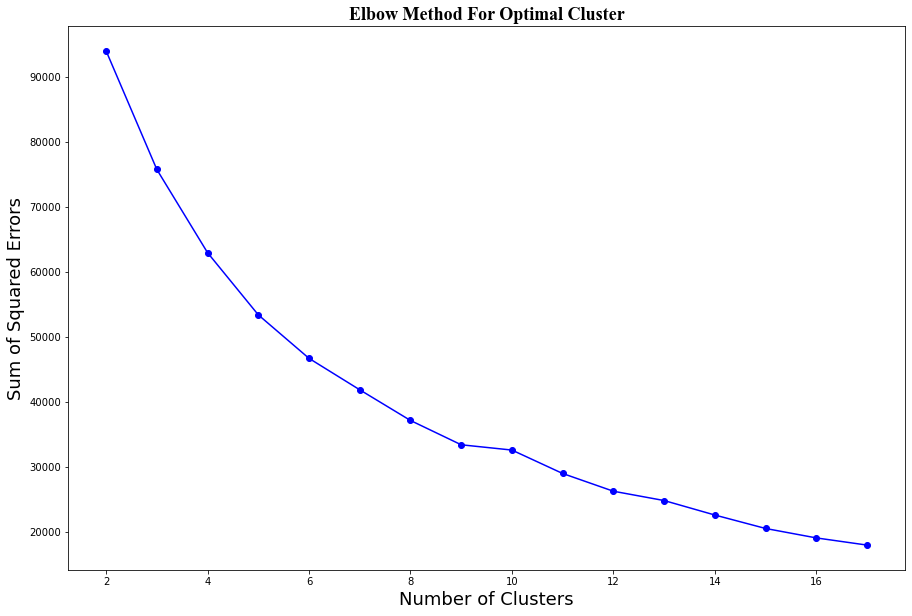

In [9]:
# Plotting the Sum of Squared Errors.
plt.figure(figsize=(15,10))
plt.plot(n_cluster, sse, 'bo-')
plt.title('Elbow Method For Optimal Cluster',
            color='black', 
            fontweight = "bold", 
            fontname = "Times New Roman",
            fontsize = 18)
plt.xlabel('Number of Clusters', fontsize = 18)
plt.ylabel('Sum of Squared Errors', fontsize = 18)
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 5) 
kmeans.fit(X)
df_cluster = df.copy()
df_cluster['cluster'] = kmeans.labels_

With 'groupby' in a loop, we can return both index(name) and rows. The name is going to be from cluster 0 to cluster 6. Then we return the rows that belong from each group.

In [11]:
# Looking at what countries are being clustered together.
for name, rows in df_cluster.groupby('cluster'): 
    print(rows['Country'].values)
    print('-'*80)
    

['Brazil' 'Bulgaria' 'Chile' 'Colombia' 'Costa Rica' 'Croatia'
 'El Salvador' 'Greece' 'Guatemala' 'Pakistan' 'Panama' 'Peru' 'Portugal'
 'Romania' 'Russia' 'Serbia' 'Slovenia' 'South Korea' 'Suriname' 'Taiwan'
 'Thailand' 'Turkey' 'Uruguay']
--------------------------------------------------------------------------------
['Australia' 'Austria' 'Canada' 'Germany' 'Ireland' 'Jamaica'
 'New Zealand' 'South Africa' 'Switzerland' 'United Kingdom'
 'United States']
--------------------------------------------------------------------------------
['Bangladesh' 'China' 'Ecuador' 'Egypt' 'Ethiopia' 'Ghana' 'Hong Kong'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Kenya' 'Kuwait' 'Lebanon' 'Libya'
 'Malaysia' 'Mexico' 'Morocco' 'Nigeria' 'Philippines' 'Saudi Arabia'
 'Sierra Leone' 'Singapore' 'Slovak Rep' 'Tanzania' 'Trinidad and Tobago'
 'United Arab Emirates' 'Venezuela' 'Vietnam' 'Zambia']
--------------------------------------------------------------------------------
['Denmark' 'Estonia' 'Finland' '

In [12]:
rows

,Country,PDI,IDV,MAS,UAI,cluster
0,Argentina,40,47,48,75,4
4,Belgium,58,81,46,82,4
13,Czech Republic,49,61,49,63,4
21,France,61,76,36,75,4
27,Hungary,37,57,79,71,4
33,Israel,2,56,40,70,4
34,Italy,41,82,61,64,4
36,Japan,46,47,85,80,4
44,Malta,48,62,40,84,4
55,Poland,61,63,56,81,4


### Bisecting K-Means 

Every time the loop runs, we split into two clusters. After every loop, we take a look to see which cluster has the largerst sse. We then pick the cluster with the largest value and split again into 2.

In [13]:
X_cls = X.copy() #X is the original dataframe, we make a copy and add a new column (Cluster).
X_cls['cluster'] = 0 #Starting with all clusters being zero.

total_sse = []
n_cluster = []
# We keep splinting.
while X_cls['cluster'].nunique() < 16:
    # Calculating sse per cluster. We subtract observation from the centroid in order to find the distance from the centroid of the cluster. We sort values to get the largest sse. 
    sse = X_cls.groupby('cluster').apply(lambda X: (((X - X.mean())**2).sum(1)**0.5).sum()).sort_values()
    print(sse.to_string())
    total_sse.append(sse.sum())
    n_cluster.append(X_cls['cluster'].nunique())
    # Finding the largest sse.
    largest_sse = sse.index[-1]
    # Selecting groups of cluster belonged to largest sse.
    indx = X_cls['cluster'] == largest_sse
    kmeans = KMeans(n_clusters=2) #Splitting into two clusters.  
    kmeans.fit(X_cls[indx].drop(columns='cluster'))
    # Labelling as a cluster.
    X_cls.loc[indx, 'cluster'] = kmeans.labels_ + 1 + max(X_cls['cluster'])

cluster
0    3383.437516
cluster
2     904.492028
1    1677.294782
cluster
3    692.111896
4    716.627346
2    904.492028
cluster
6    150.430088
5    553.029011
3    692.111896
4    716.627346
cluster
6    150.430088
7    248.460837
8    324.286319
5    553.029011
3    692.111896
cluster
10    107.958449
6     150.430088
7     248.460837
8     324.286319
9     492.950944
5     553.029011
cluster
10    107.958449
12    122.273861
6     150.430088
7     248.460837
11    306.075166
8     324.286319
9     492.950944
cluster
10    107.958449
12    122.273861
14    125.614298
6     150.430088
7     248.460837
13    273.376242
11    306.075166
8     324.286319
cluster
16     95.425502
10    107.958449
12    122.273861
14    125.614298
6     150.430088
15    167.752309
7     248.460837
13    273.376242
11    306.075166
cluster
17     32.031235
16     95.425502
10    107.958449
12    122.273861
14    125.614298
6     150.430088
15    167.752309
18    215.942198
7     248.460837
13    273.3762

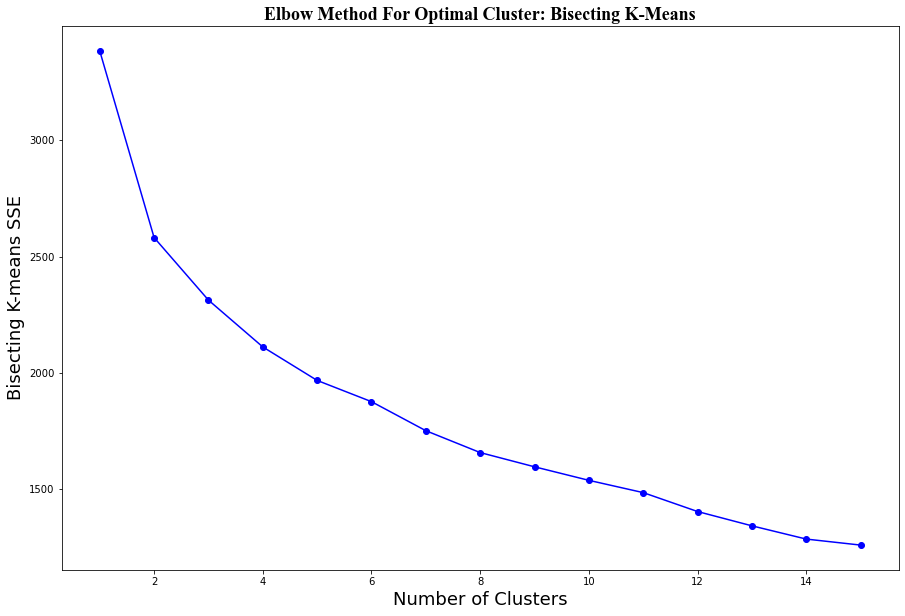

In [14]:
# Plotting the Sum of Squared Errors.
plt.figure(figsize=(15,10))
plt.plot(n_cluster, total_sse, 'bo-')
plt.title('Elbow Method For Optimal Cluster: Bisecting K-Means',
            color='black', 
            fontweight = "bold", 
            fontname = "Times New Roman",
            fontsize = 18)
plt.xlabel('Number of Clusters', fontsize = 18)
plt.ylabel('Bisecting K-means SSE', fontsize = 18)
plt.show()

There is a drastic drop at 2 that gradually descreases after. 

In [15]:
# Recalculating with only 5 clusters.
X_cls = X.copy()
X_cls['cluster'] = 0

total_sse = []
n_cluster = []
while X_cls['cluster'].nunique() < 5:
    sse = X_cls.groupby('cluster').apply(lambda X: (((X - X.mean())**2).sum(1)**0.5).sum()).sort_values()
    total_sse.append(sse.sum())
    n_cluster.append(X_cls['cluster'].nunique())
    largest_sse = sse.index[-1]
    indx = X_cls['cluster'] == largest_sse
    kmeans = KMeans(n_clusters=2)   
    kmeans.fit(X_cls[indx].drop(columns='cluster'))
    X_cls.loc[indx, 'cluster'] = kmeans.labels_ + 1 + max(X_cls['cluster'])

In [16]:
df_bisect = df.copy()
df_bisect['cluster'] = X_cls['cluster']

for name, rows in df_bisect.groupby('cluster'):
    print(rows['Country'].values)
    print('-'*80)

['Argentina' 'Brazil' 'Bulgaria' 'Chile' 'Colombia' 'Costa Rica' 'Croatia'
 'El Salvador' 'Greece' 'Guatemala' 'Japan' 'Mexico' 'Panama' 'Peru'
 'Poland' 'Portugal' 'Romania' 'Russia' 'Serbia' 'Slovenia' 'South Korea'
 'Spain' 'Suriname' 'Turkey' 'Uruguay']
--------------------------------------------------------------------------------
['Denmark' 'Estonia' 'Finland' 'Latvia' 'Lithuania' 'Netherlands' 'Norway'
 'Sweden']
--------------------------------------------------------------------------------
['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'France'
 'Germany' 'Hungary' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Malta'
 'New Zealand' 'South Africa' 'Switzerland' 'United Kingdom'
 'United States']
--------------------------------------------------------------------------------
['Bangladesh' 'China' 'Ecuador' 'Ethiopia' 'Ghana' 'Hong Kong' 'Indonesia'
 'Iran' 'Kenya' 'Nigeria' 'Pakistan' 'Sierra Leone' 'Singapore' 'Taiwan'
 'Tanzania' 'Thailand' 'Trinidad and Tobago' 'Vietna

# 4. Hierarchical Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [18]:
X = X.set_index(df['Country'])

In [19]:
fig = ff.create_dendrogram(X, orientation = 'left', 
                                   labels = X.index)

fig.update_layout(width = 1000, 
                  height= 1500,
                  title = 'Hierarchical Clustering Dendogram',
                  title_font_family = "Times New Roman",
                  title_font_color = "black",
                  title_font_size = 25)

                    
fig.update_xaxes(
     title_text = "Distance",
     title_font = dict(size = 25, family = "Times New Roman", color = "black"),
     tickfont = dict(family = "Times New Roman", color = "black", size = 20))

fig.update_yaxes(
     title_text = "Countries - Leaves of the Dendrogram Tree",
     title_font= dict(size = 25,  family = "Times New Roman", color = "black"),
     tickfont=  dict(family = "Times New Roman", color = "black", size = 12))

fig.show()

# 5. Visualization 

In [20]:
import plotly.express as px

In [21]:
mapping = {'Iran': 'Iran (Islamic Republic of)', 'Czech Republic': 'Czechia',
 'Russia': 'Russian Federation', 'Slovak Rep': 'Slovakia' ,'South Korea': 'Korea (Democratic People\'s Republic of)', 'Taiwan': "Taiwan, Province of China" , 
 'Tanzania': 'Tanzania, United Republic of', 'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
 'United States':'United States of America' ,'Venezuela':'Venezuela (Bolivarian Republic of)' , 'Vietnam':'Viet Nam' }

In [22]:
df_cluster.shape

(83, 6)

### 5.1. Visualize Clusters on The Map

In [23]:
world_df = pd.read_csv('https://raw.githubusercontent.com/lwndp/iso-3-countries/main/iso-countries.csv').rename(columns={' country':'Country'})
world_df['Country'] = world_df['Country'].str.strip()
world_df.head()

,iso-3,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands


In [24]:
world_df['Country'].tolist();

In [25]:
df_map = df_cluster.copy()
# df_map['cluster'] = df_map['cluster'].replace(mapping)
df_map['cluster'] = df_map['cluster'].astype(str)
df_map = df_map.merge(world_df, how='left')
df_map.head()

,Country,PDI,IDV,MAS,UAI,cluster,iso-3
0,Argentina,40,47,48,75,4,ARG
1,Australia,26,98,53,41,1,AUS
2,Austria,0,57,70,59,1,AUT
3,Bangladesh,74,16,47,50,2,BGD
4,Belgium,58,81,46,82,4,BEL


In [26]:
df_map

,Country,PDI,IDV,MAS,UAI,cluster,iso-3
0,Argentina,40,47,48,75,4,ARG
1,Australia,26,98,53,41,1,AUS
2,Austria,0,57,70,59,1,AUT
3,Bangladesh,74,16,47,50,2,BGD
4,Belgium,58,81,46,82,4,BEL
...,...,...,...,...,...,...,...
78,United States,31,100,54,36,1,NaN
79,Uruguay,53,35,31,88,0,URY
80,Venezuela,75,7,64,65,2,NaN
81,Vietnam,63,16,33,21,2,NaN


In [27]:
df_map['cluster'].value_counts()

2    30
0    23
4    11
1    11
3     8
Name: cluster, dtype: int64

### Exploring Clusters

In [28]:
df_map[df_map['iso-3'].isna()]

,Country,PDI,IDV,MAS,UAI,cluster,iso-3
13,Czech Republic,49,61,49,63,4,NaN
30,Iran,50,41,36,49,2,NaN
58,Russia,88,38,29,83,0,NaN
63,Slovak Rep,100,54,100,41,2,NaN
66,South Korea,52,14,32,74,0,NaN
71,Taiwan,50,12,38,58,0,NaN
72,Tanzania,56,24,34,42,2,NaN
77,United Kingdom,25,97,58,25,1,NaN
78,United States,31,100,54,36,1,NaN
80,Venezuela,75,7,64,65,2,NaN


In [29]:
world_df['Country'].tolist();

In [30]:
world_df

,iso-3,Country
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands
...,...,...
244,WSM,Samoa
245,YEM,Yemen
246,ZAF,South Africa
247,ZMB,Zambia


In [31]:
df_cluster['Country'].tolist();

In [32]:
fig = px.choropleth(df_map, locations = "iso-3",
                    color="cluster", 
                    hover_name="Country", 
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(width  = 1200, 
                  height = 700,
                  title = 'World Map',
                  title_font_family = "Times New Roman",
                  title_font_color = "black",
                  title_font_size = 25)
fig.show()

### 6.2 Visualize the Meaning of Each Cluster

In [33]:
from wordcloud import WordCloud

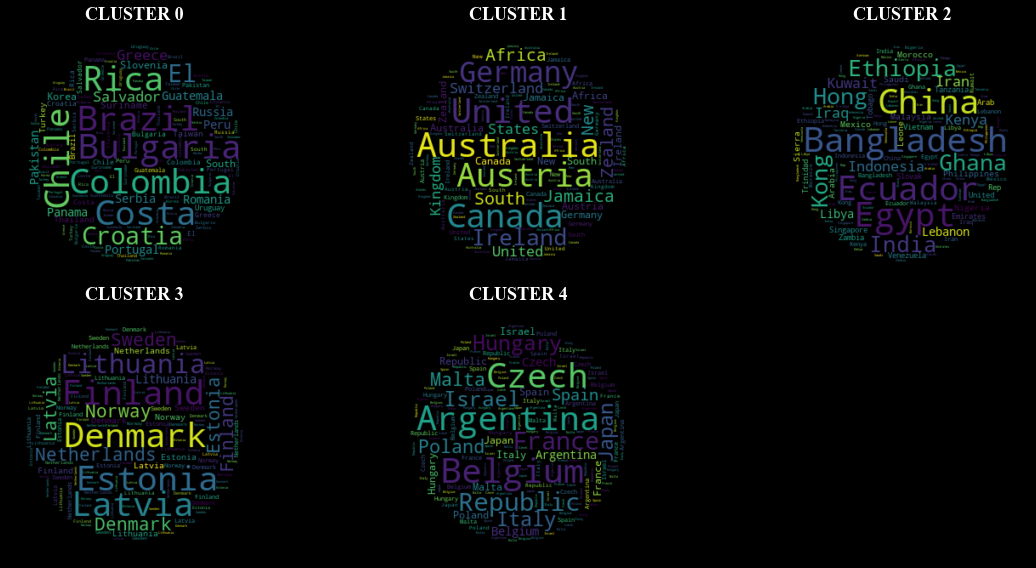

In [34]:
plt.figure(figsize = (20, 15), facecolor='black')
plt.subplots_adjust(hspace = 0.1, wspace = 0.1)

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

for i, (name, rows) in enumerate(df_cluster.groupby('cluster')):    
    
    cloud = WordCloud(
        background_color = 'black', 
        repeat = True, 
        mask = mask, 
        max_font_size = 40
                     ).generate(' '.join(rows['Country'].tolist()))

    plt.subplot(3,3,i+1)
    plt.imshow(cloud, interpolation = "bilinear")
    plt.axis('off')    
    plt.title(f'CLUSTER {i}',
        color='white', 
        fontweight = "bold", 
        fontname = "Times New Roman",
        fontsize = 18)
plt.show()

In [35]:
vocab = {'PDI': ['respect father master servant brother younger older wisdom favor protect obey orders pleasing', 
                 'rights complain negotiate fairness task necessity codetermination objectives question criticize'],
         'IDV': ['self friendship contract litigation self-interest self-respect self-actualizing individual dignity pleasure adventure guilt privacy',
                 'harmony face obligation sacrifice family tradition decency honor duty loyalty shame'],
         'MAS': ['career competition fight aggressive success winner deserve merit excel force big fast tough hard quantity total power action',
                 'quality caring solidarity modesty compromise help love grow small soft slow tender touch'],
         'UAI': ['structure duty truth law order certain pure clear secure safe predictable tight',
                 'maybe creative conflict tolerant experiment spontaneous relativity insight unstructured loose flexible']}

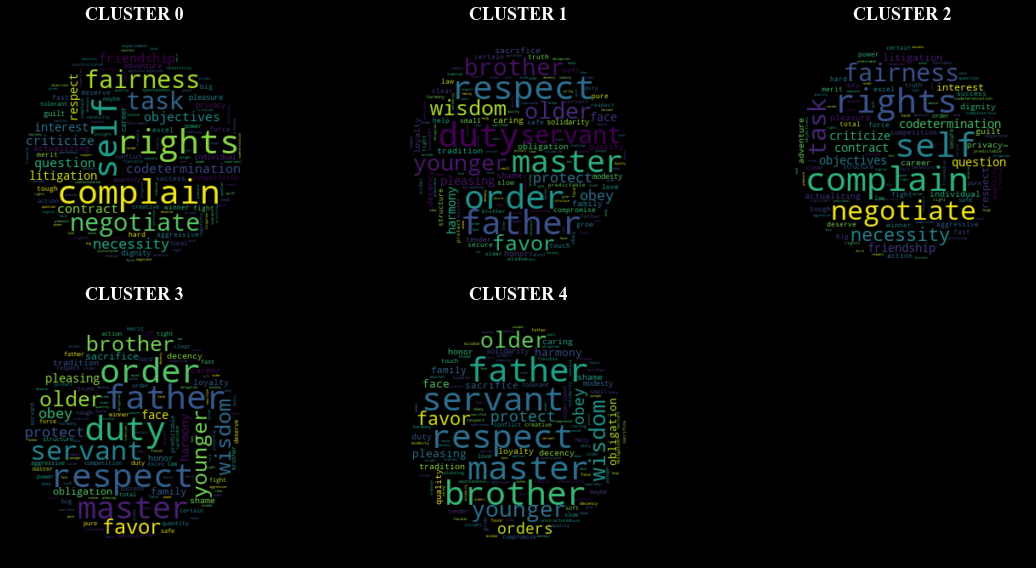

In [36]:
plt.figure(figsize = (20, 15), facecolor='black')
plt.subplots_adjust(hspace = 0.1, wspace = 0.1)

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

for i, (name, rows) in enumerate(df_cluster.groupby('cluster')):    
    score = (rows[vocab.keys()].mean() > 50)*1
    words = ''
    for key, val in vocab.items():
        words += val[score[key]] + ' '
        cloud = WordCloud(
            background_color = 'black', 
            repeat = True, 
            mask = mask, 
            max_font_size = 40
                        ).generate(words)

        plt.subplot(3,3,i+1)
        plt.imshow(cloud, interpolation = "bilinear")
        plt.axis('off')    
        plt.title(f'CLUSTER {i}',
            color='white', 
            fontweight = "bold", 
            fontname = "Times New Roman",
            fontsize = 18)

plt.show()


# 6. Results

This project was immensely rewarding to work on. I was happy with the results I got after grouping and visualizing the data. First, what caught my attention from the beginning was the composition of the countries in each group.

It can be noted that each cluster has a group of countries that share similar cultural, social, economic, and political aspects.

For example, in Group Two:

* Egypt' 'India' 'Iran' 'Iraq' 'Kuwait' 'Lebanon' 'Libya' 'Morocco' 'Philippines' 'Saudi Arabia' 'Slovak Republic' 'United Arab Emirates' 'Venezuela'

It can be noticed that it is composed of countries with similar aspects such as culture and a developing economy. Additionally, some of these countries have had political conflicts within their government. Some of these countries are also considered to have authoritarian governments such as Venezuela and the United Arab Emirates. Venezuela surprisingly scores 7 with IDV in contrast with the United States which has an IDV score of 100. 


Cluster Three, on the other hand, has countries such as,

* 'Denmark' 'Estonia' 'Finland' 'Latvia' 'Lithuania' 'Netherlands' 'Norway' 'Sweden'

Here we can analyze the high standard of quality of life in this group of countries, which is perhaps why we see words like competition, career, strength, success, and winner being used to describe them. 

Countries such as the United States, Australia, and the United Kingdom were also grouped in the same cluster. These countries, considered developed countries, have a high value of IDV. For this reason, they are described by the word cloud as self-respect, order, protection, and duty.

I was surprised at first, and after a second thought, I was able to agree with the idea of Argentina being in Cluster Four with other European countries. Perhaps, Argentina's high score in UAI is what has led the model to group it with the other countries. Indeed, Argentina is considered to be safe, and secure. For that reason I also think that the wold cloud perfectly describes Cluster Four. 

In overall, I believe that each cluster is closely aligned with our reality and the word cloud does reflects the mean score of indices for every cluster. 

Copyright &copy; 2022 Lucas Araujo Weissman. All rights reserved.